# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thinadhoo
City not found. Skipping...
Processing Record 2 of Set 1 | prince rupert
City not found. Skipping...
Processing Record 3 of Set 1 | west island
City not found. Skipping...
Processing Record 4 of Set 1 | newman
City not found. Skipping...
Processing Record 5 of Set 1 | whitehorse
City not found. Skipping...
Processing Record 6 of Set 1 | port alfred
City not found. Skipping...
Processing Record 7 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 9 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 10 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 11 of Set 1 | arizona city
City not found. Skipping...
Processing Record 12 of Set 1 | saint-philippe
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
City not found. Skipping...
Proces

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data = pd.read_csv("/Users/natalymartinez/Desktop/Module Challenges/Module 6 Challenge/output_data/cities-2.csv")
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City_ID       585
City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       582
Date          585
dtype: int64


In [51]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,hithadhoo,-0.6000,73.0833,27.64,72,9,5.21,MV,1730670467
1,1,coahuayana de hidalgo,18.7000,-103.6583,29.36,70,66,2.51,MX,1730670468
2,2,sumbawa besar,-8.5000,117.4333,23.84,90,32,1.91,ID,1730670469
3,3,cabedelo,-6.9811,-34.8339,26.37,73,5,6.13,BR,1730670470
4,4,cidreira,-30.1811,-50.2056,21.68,85,100,6.73,BR,1730670472


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,hithadhoo,-0.6000,73.0833,27.64,72,9,5.21,MV,1730670467
1,1,coahuayana de hidalgo,18.7000,-103.6583,29.36,70,66,2.51,MX,1730670468
2,2,sumbawa besar,-8.5000,117.4333,23.84,90,32,1.91,ID,1730670469
3,3,cabedelo,-6.9811,-34.8339,26.37,73,5,6.13,BR,1730670470
4,4,cidreira,-30.1811,-50.2056,21.68,85,100,6.73,BR,1730670472


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

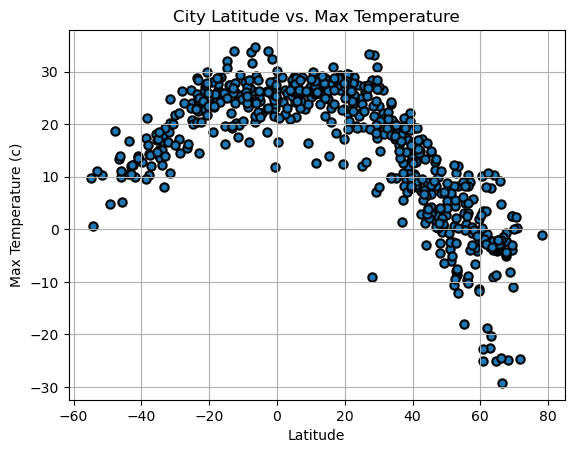

In [54]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", linewidths=1.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

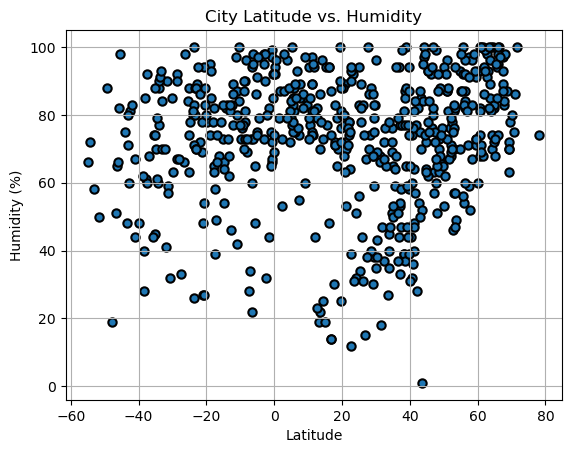

In [55]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", linewidths=1.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

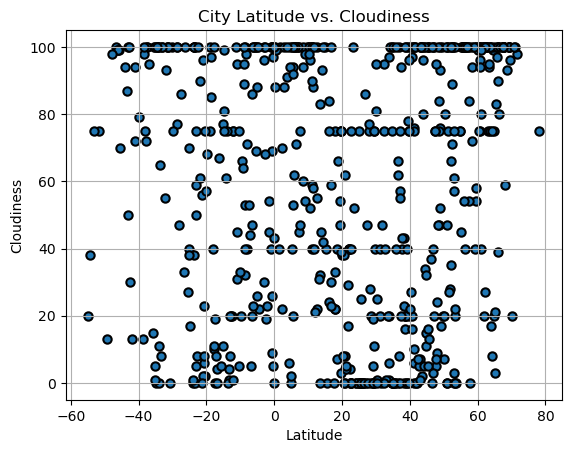

In [56]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", linewidths=1.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

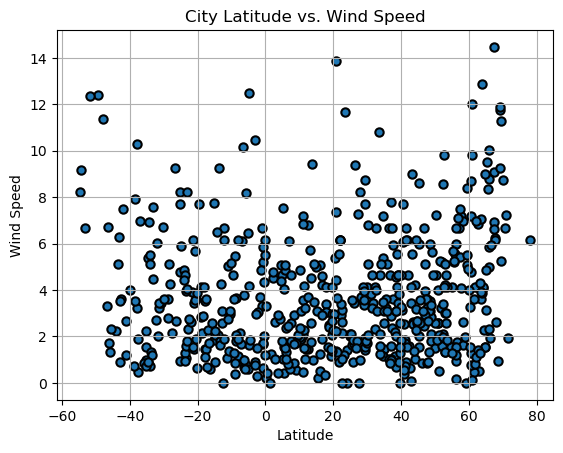

In [57]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", linewidths=1.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linear_regress_plot(x, y, x_label, y_label, hemisphere, line_placement):
   
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)

    #Calculate regression line
    regression_line = slope * x + intercept
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x, y, color="blue", edgecolors="black", linewidths= 1.5)
    linear_regress_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"
    plt.xlabel(x_label, fontsize = 14)
    plt.ylabel(y_label, fontsize = 14)
    plt.title(f'{hemisphere} Hemisphere - {x_label} vs. {y_label}', fontsize = 15)
    plt.annotate(linear_regress_eq, line_placement, fontsize=22, color='red')

    print(f"The r-squared value is: {r_value**2}")
    correlation_coeff = st.pearsonr(x, y)
    print(f"The correlation between both values is {round(correlation_coeff[0],2)}")
    return plt.plot(x, regression_line, "r-")


In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
1,1,coahuayana de hidalgo,18.7000,-103.6583,29.36,70,66,2.51,MX,1730670468
5,5,ust-nera,64.5667,143.2000,-25.11,100,99,2.27,RU,1730670473
6,6,la ronge,55.1001,-105.2842,3.14,87,100,4.12,CA,1730670474
7,7,tiksi,71.6872,128.8694,-24.72,100,98,1.95,RU,1730670475
8,8,alibag,18.6411,72.8792,26.41,65,7,2.42,IN,1730670476


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,hithadhoo,-0.6000,73.0833,27.64,72,9,5.21,MV,1730670467
2,2,sumbawa besar,-8.5000,117.4333,23.84,90,32,1.91,ID,1730670469
3,3,cabedelo,-6.9811,-34.8339,26.37,73,5,6.13,BR,1730670470
4,4,cidreira,-30.1811,-50.2056,21.68,85,100,6.73,BR,1730670472
9,9,west island,-12.1568,96.8225,25.99,89,75,6.69,CC,1730670478


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7260508576086904
The correlation between both values is -0.85


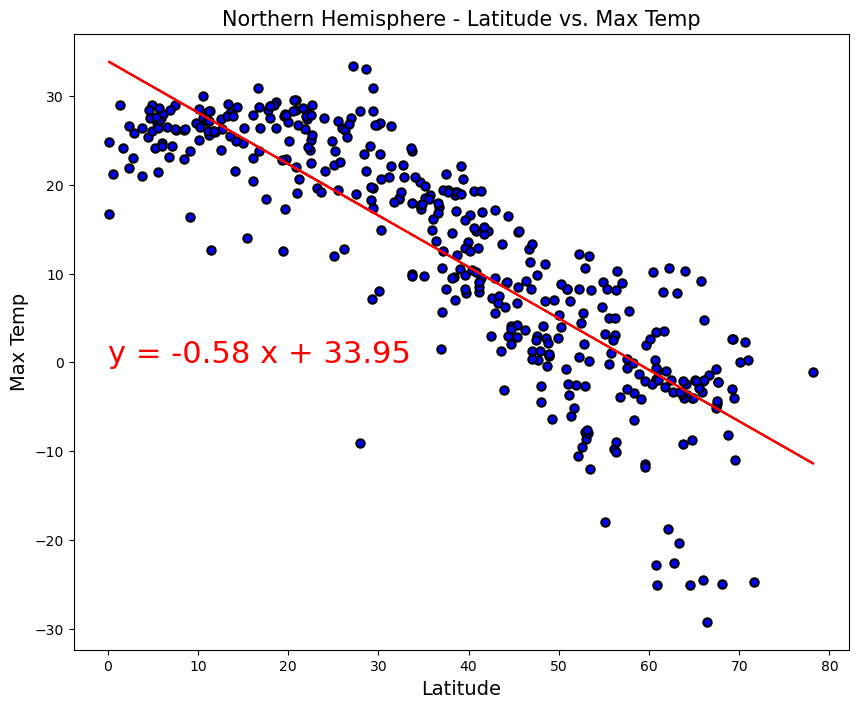

In [61]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_regress_plot(x, y, "Latitude", "Max Temp", "Northern", (0,0))
plt.show()

The r-squared value is: 0.5606830919603188
The correlation between both values is 0.75


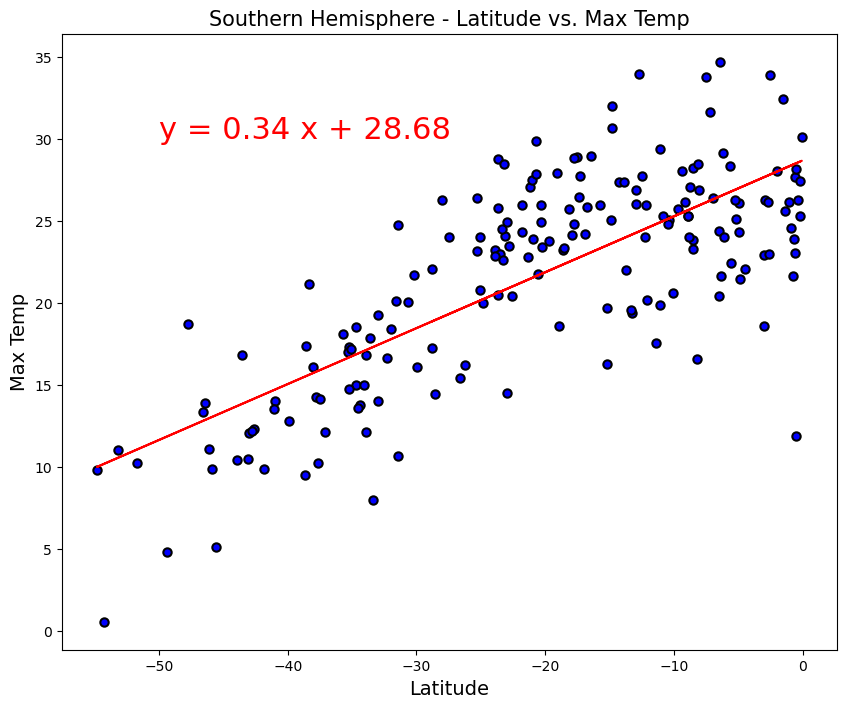

In [62]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regress_plot(x, y, "Latitude", "Max Temp", "Southern", (-50, 30))
plt.show()

**Discussion about the linear relationship:** 
The linear relationship between Max temp and latitude is 0.75 for both hemispheres. 


### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.020459430510022962
The correlation between both values is 0.14


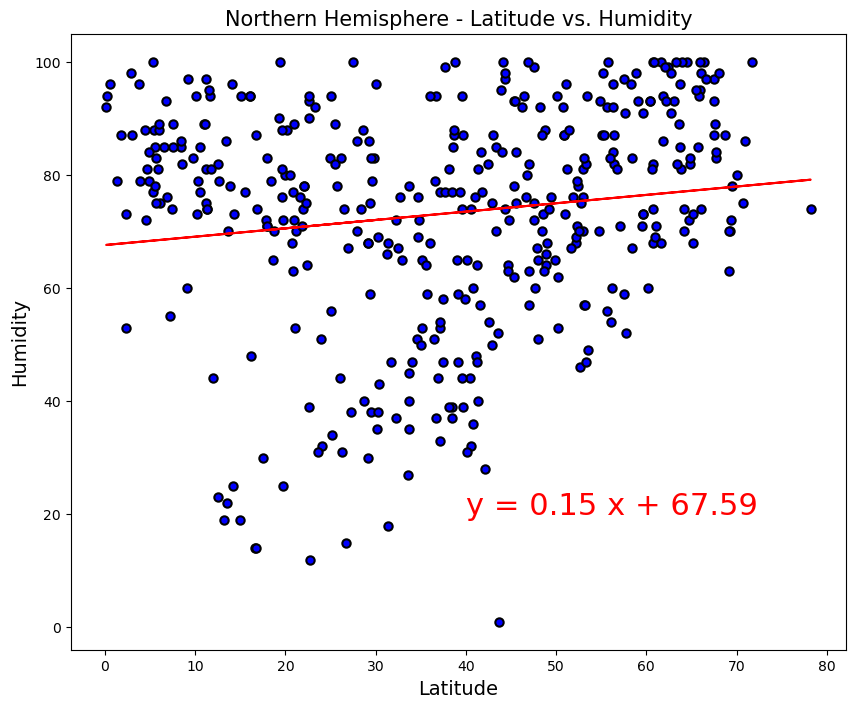

In [63]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_regress_plot(x, y, "Latitude", "Humidity", "Northern", (40, 20))
plt.show()

The r-squared value is: 0.04031844675774457
The correlation between both values is 0.2


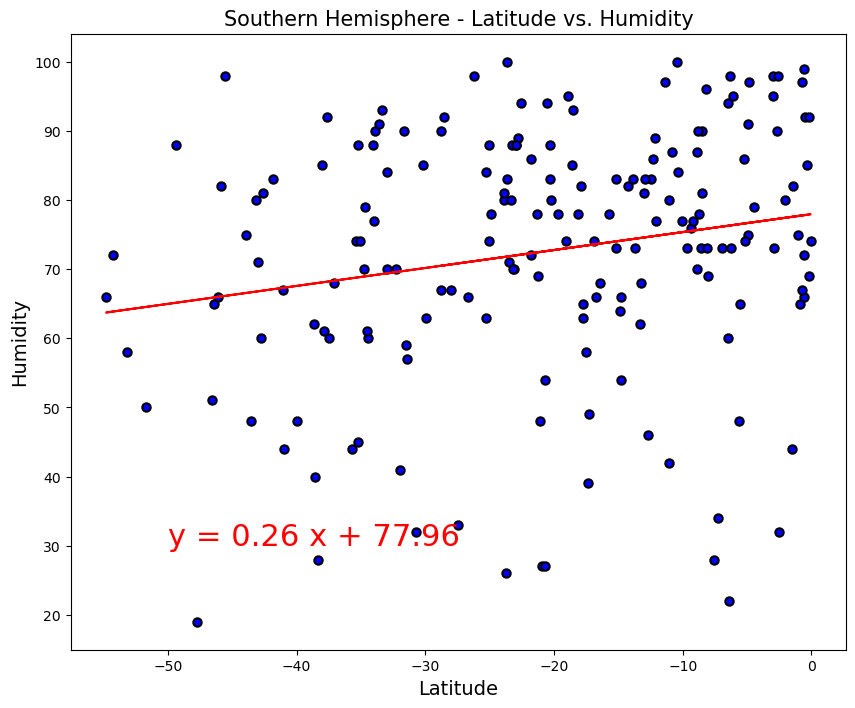

In [64]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_regress_plot(x, y, "Latitude", "Humidity", "Southern", (-50, 30))
plt.show()

**Discussion about the linear relationship:**
The graph above indicates the linear relationship between Latitude and Humidity. The graph shows that there isn't a strong correlation between the two varibles it presents a coefficient of 0.2.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.03428038676808699
The correlation between both values is 0.19


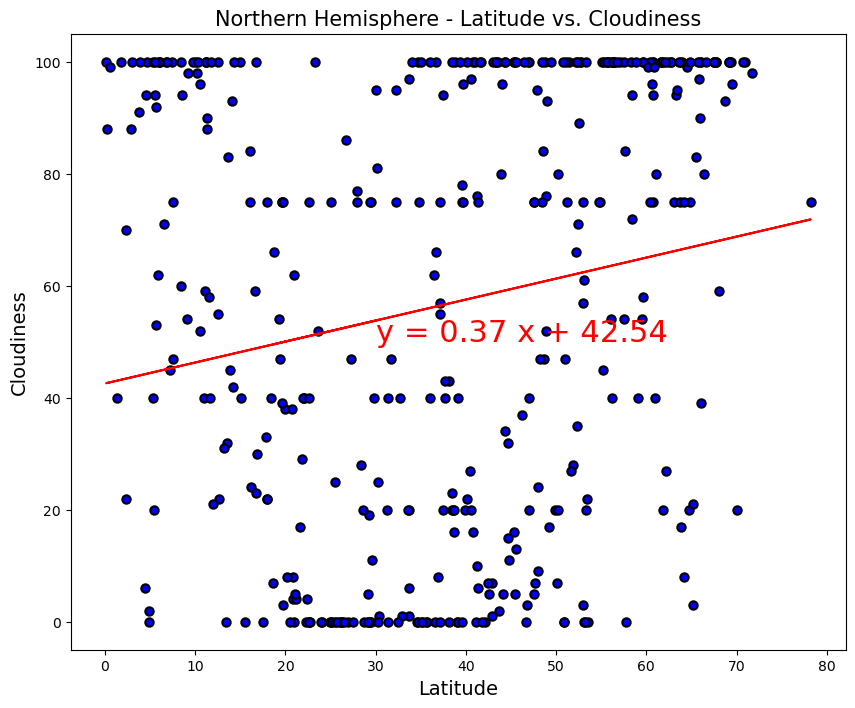

In [337]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_regress_plot(x, y, "Latitude", "Cloudiness", "Northern", (30, 50))
plt.show()

The r-squared value is: 0.015776281218038025
The correlation between both values is -0.13


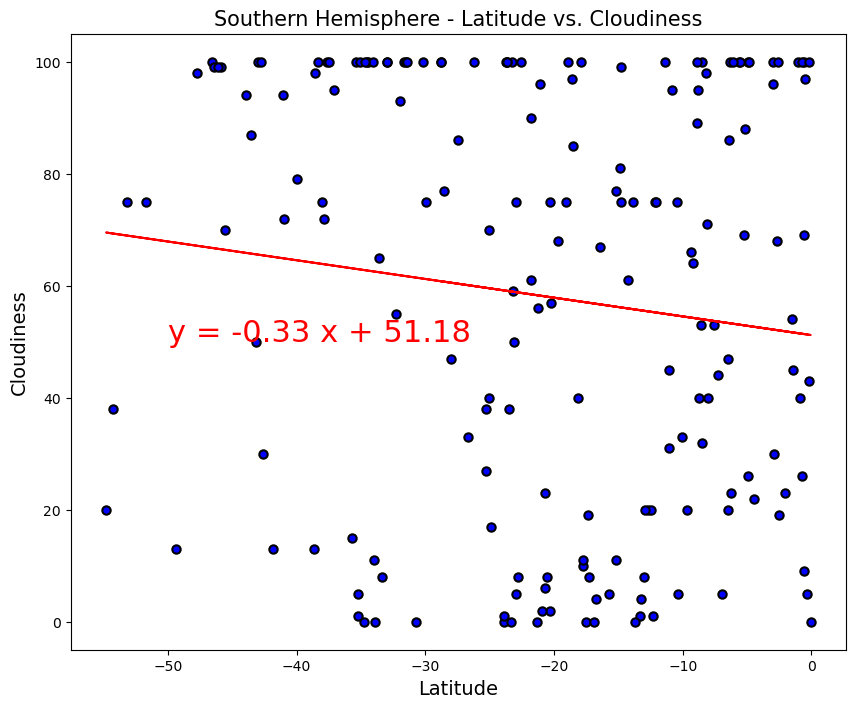

In [340]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_regress_plot(x, y, "Latitude", "Cloudiness", "Southern", (-50, 50))
plt.show()

**Discussion about the linear relationship:**

This correlation between Cloudiness in both Hemisphere is at 0.3. Based off the code it is in the considered weak.



### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.0734051031693164
The correlation between both values is 0.27


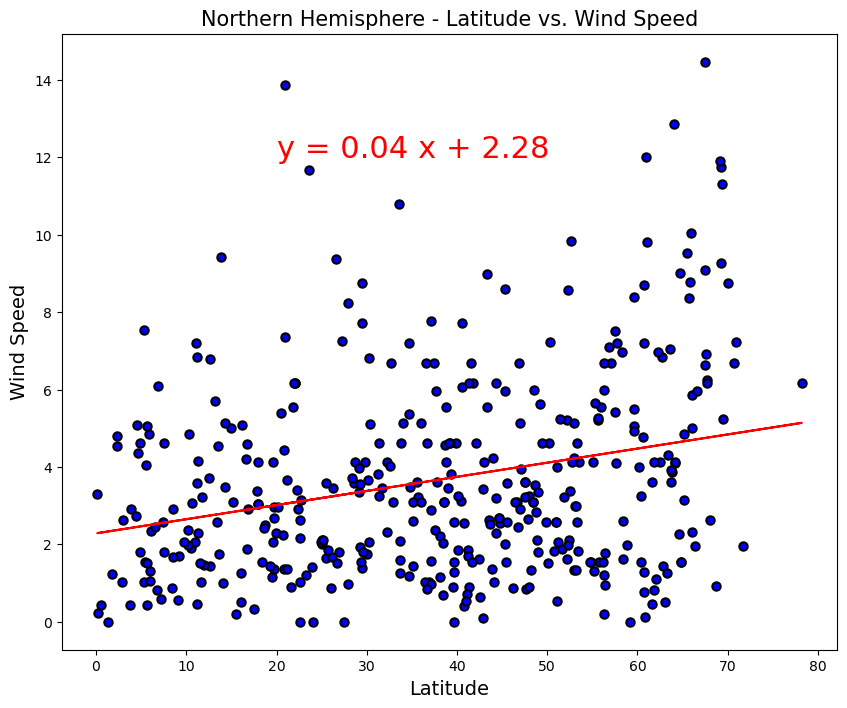

In [341]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_regress_plot(x, y, "Latitude", "Wind Speed", "Northern", (20, 12))
plt.show()

The r-squared value is: 0.04119402716501655
The correlation between both values is -0.2


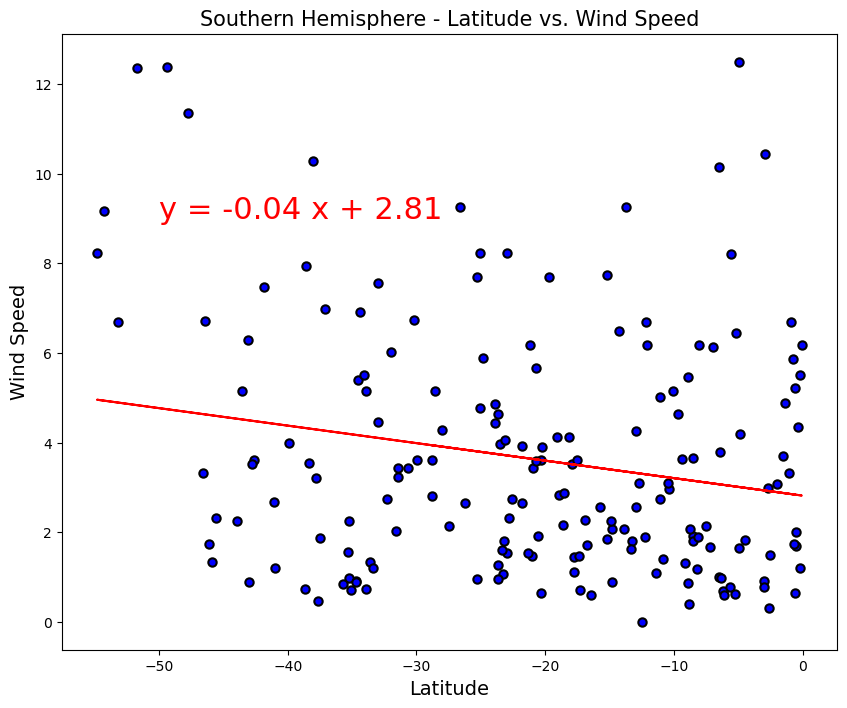

In [344]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_regress_plot(x, y, "Latitude", "Wind Speed", "Southern", (-50, 9))
plt.show()

**Discussion about the linear relationship:** 
This graph also indiciates that corrleaction is going down meaning that this is also weak at 0.2 like the graphs shown above. 